# HandWritten Digit Recognition using MNIST dataset

In [170]:
import numpy as np
import cv2 as cv
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Convolution2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [171]:
# def load_data(path='mnist.npz'):
#     path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz', file_hash='8a61469f7ea1b51cbae51d4f78837e45')
#     with np.load(path, allow_pickle=True) as f:
#         X_train, y_train = f['x_train'], f['y_train']
#         X_test, y_test = f['x_test'], f['y_test']
#     return (X_train, y_train), (X_test, y_test)

In [172]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data Preprocessing
##### Reshaping the dataset inputs """ X_train & X_test """ to the shape that our model expects when training the model. 
###### Number of train sets """X_train =====> 60000"""",
###### Number of test sets"""" X_test =====> 10000""". 
###### shape of each image that is 28 * 28 pixels. 

In [173]:
## Checking out the shapes involved in dataset
# print ("X_train:=====> {}".format(X_train.shape))
# print ("y_train:=====> {}".format(y_train.shape))
# print ("X_test: =====> {}".format(X_test.shape))
# print ("y_test: =====> {}".format(y_test.shape))

In [174]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [175]:
print ("X_train:=====> {}".format(X_train.shape))

X_train:=====> (60000, 28, 28, 1)


In [176]:
print ("y_train:=====> {}".format(y_train.shape))

y_train:=====> (60000,)


In [177]:
print ("X_test: =====> {}".format(X_test.shape))

X_test: =====> (10000, 28, 28, 1)


In [178]:
print ("y_test: =====> {}".format(y_test.shape))

y_test: =====> (10000,)


### Encoding (Encoding the target variable.)
###### coloumn will be created for each output and a binary variable is inputted for each kind
Example ===> If image is of number 2 then it will be something like this ==> [0,0,1,0,0,0,0,0,0]

In [179]:
# Encoding the labels 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Building  model

Sequential model is used because it is the easiest way to build a model in Keras.<br>
It allows to build the model layer by layer.<br>
*add()* is used for adding various layers.<br><br>                                                  

In [180]:
model = Sequential()

## Creating and declaring the layer


##### Kernel_Size
It is the size of the filter matrix for the convolution.<br>
kernel_size = 3 means that a 3x3 filter matrix is going to be used.<br>
##### pool_size
It is refered to the size of the filter window which will be used by MaxPooling Layers for the max pooling operation.<br> 
pool_size = 2 means that a 2x2 window will be used for performing each iteration of max pooling operation.<br>
##### Activation 
It is the activation function for the layer.<br> 
activation = 'ReLU' (Rectified Linear Activation). 
This activation function is known for performing well in terms of speed and output in the neural network.
(In simple languge it speeds up the performance.)
<br>
Takes shape of 28 by 28 and 1 where 1 signifies as the greyscale

In [181]:
FirstLayer = Convolution2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))

max pooling layer 1 will fed to the next convolutional layer of 2 out of 32 layer nodes which will perform convolution operation on it using a window of size 3*3 

In [182]:
SecondLayer = MaxPooling2D(pool_size=2)

Then this max pooling layer 2 will do the asme max pooling operation as the above layer

In [183]:
ThirdLayer = Convolution2D(32, kernel_size=3, activation='relu')

In [184]:
FourthLayer = MaxPooling2D(pool_size=2)

The below dropout layer simplify the network further performing the dropout regularization.
It drops out the random nodes from the network
The number of nodes to be dropped depends on the comparison between each nodes achieved and the probabiltiy we provide 

In [185]:
FifthLayer = Dropout(0.5)

Half of the nodes will be dropped because the we are setting up th eprobability to 0.5

In [186]:
SixthLayer = Flatten()

#### Flatten 
The connection between convolution and the dense layers 


In [187]:
SeventLayer = Dense(128, activation="relu")

using dense layer with relu activation

In [188]:
EighthLayer = Dropout(0.5)

In [189]:
NinthLayer = Dense(10, activation='softmax')

Final dense layer with the activation softmax it acts as the output layer for the network 

It consists of 10 nodes in our output layer one for each possible outcome which is from 0 to 9 

softmax makes the output sum up to 1 , so that the output contains a series of possibillities 
finally the moderl can now predict the one with highest probability

## Adding the layers to the model

In [190]:
model.add(FirstLayer)
model.add(SecondLayer)
model.add(ThirdLayer)
model.add(FourthLayer)
model.add(FifthLayer)
model.add(SixthLayer)
model.add(SeventLayer)
model.add(EighthLayer)
model.add(NinthLayer)

### Flow of the model


## compile model
Three parameter names __optimizer__ ,__loss function__ and __metrics__ is used. 
- __Optimizer__ - It controls the learning rate. We will be using 'adam' optimizer. It is a very good optimizer as it utilises the perks of both Stochastic gradient and RMSprop optimizers.
- __Loss function__ - We will be using 'categorical_crossentropy' loss function. It is the most common choice for classification. A lower score corresponds to better performance.
- __Metrics__ - To make things easier to interpret, we will be using 'accuracy' metrix to see the accuracy score on the validation set while training the model.

In [191]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

'optimizer' controls the learning rate 

Using 'categorical_crossentropy' loss function because it is commonly used for classification 

using the accuracy matrix to see the accuracy score on the validation set while training the model 


## Training the model

In [192]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.9262 - accuracy: 0.7617 - val_loss: 0.1196 - val_accuracy: 0.9642
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2727 - accuracy: 0.9199 - val_loss: 0.0700 - val_accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2061 - accuracy: 0.9388 - val_loss: 0.0595 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1736 - accuracy: 0.9489 - val_loss: 0.0527 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1592 - accuracy: 0.9527 - val_loss: 0.0504 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1444 - accuracy: 0.9581 - val_loss: 0.0525 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1361 - accuracy: 0.9611 - val_loss: 0.0539 -

## Making a prediction

## Testing the model on the real image
### At first preprocessing the image

In [214]:
image = cv.imread('./handwrittenDigit.png')

# converting the image into grayscale
grey = cv.cvtColor(image.copy(), cv.COLOR_BGR2GRAY)

# Binarize the grayscaled image (segregate the digit into white and making the rest black)
ret, thresh = cv.threshold(grey.copy(), 75, 255, cv.THRESH_BINARY_INV)


# Adding Further modification until it becomes a lot more similar to the image feeded in the training dataset 
_, outlines, _ = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
preprocess = []
for outline in outlines:
    x,y,width,height = cv.boundingRect(outline)
    
    # Creating a rectangle around the digit in the original image 
    cv.rectangle(image, (x,y), (x+width, y+height), color=(0, 255, 0), thickness=2)
    
    # Refining out the digit from the image corresponding to the current outline in the for loop
    refining_digit = thresh[y:y+height, x:x+width]
    
    # Resizing that digit into 18 by 18
    resizing_digit = cv.resize(refining_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padding = np.pad(resizing_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocess.append(padding)

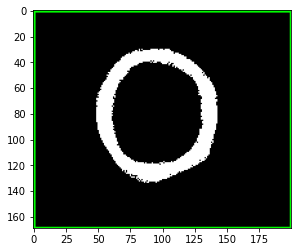

In [215]:
plt.imshow(image)
plt.show()
prenp = np.array(preprocess)

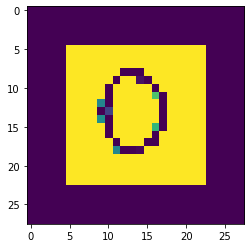



 Prediction: 0

 Softmax Prediction from the neural network:

 [[6.4711809e-01 1.0435095e-03 2.1773863e-03 8.4961858e-03 1.2385094e-03
  4.2887323e-02 9.9855274e-02 2.3574296e-04 1.9349377e-01 3.4542037e-03]]


Pos Prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [216]:
for refining_digit in preprocess:
    prediction = model.predict(refining_digit.reshape(1, 28, 28, 1))   
    print ("")
    print ("")
    print ("")
    print ("")
    plt.imshow(refining_digit.reshape(28, 28))
    plt.show()
    print("\n\n Prediction: {}".format(np.argmax(prediction)))
    print ("\n Softmax Prediction from the neural network:\n\n {}".format(prediction))
    shape_prediction = np.zeros(prediction.shape)
    shape_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nPos Prediction: \n\n {}".format(shape_prediction))